<a href="https://colab.research.google.com/github/hy2632/SystematicTrading/blob/main/SP500_sigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# import pandas_datareader as pdr
from pandas_datareader import data
import matplotlib.pyplot as plt
import pdb

In [ ]:
%cd drive/MyDrive/SystematicTrading/

/content/drive/MyDrive/SystematicTrading


In [ ]:
from tqdm.notebook import tqdm

"Equities usually have an annualized standard deviation of 20% "

In [ ]:
def get_stddev(symbol="AAPL", start_date="20190101", end_date="20200101"):
    df = data.get_data_yahoo(symbol, start_date, end_date)
    return np.std(df["Adj Close"].shift(1) / df["Adj Close"] - 1) * np.sqrt(365)

In [ ]:
for stock in ["AAPL", "AMD", "NVDA", "GM", "DD", ""]:
    print(get_stddev(stock))

0.318887662442679
0.6218947931573402
0.4939896139424514
0.2940322184658661
0.40187437409768434


In [ ]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

first_table = payload[0]
second_table = payload[1]

df = first_table

In [ ]:
symbols = df.Symbol.to_list()
stds = []
for stock in tqdm(symbols):
    try:
        std = get_stddev(stock)
        stds.append((stock, std))
    except:
        continue
    
    

In [ ]:
df_std = pd.DataFrame(stds, columns=["Symbol", "Annualized_STD"])

In [ ]:
df_std.to_csv("SP500_std.csv")

In [ ]:
df_std = pd.read_csv("SP500_std.csv")

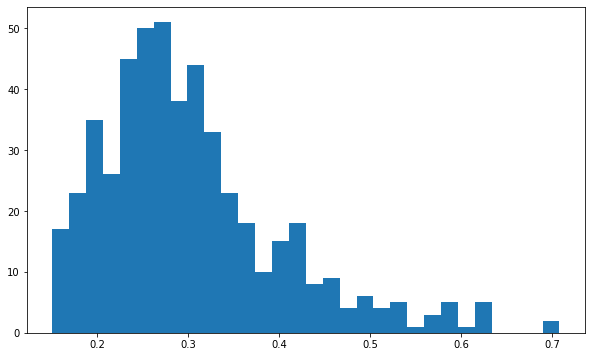

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_std.Annualized_STD, bins=30)
plt.show()

In [ ]:
df_std.Annualized_STD.median(),df_std.Annualized_STD.mean()

(0.28279639293459197, 0.30327334491593905)